In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4360, 50), (1091, 50), (4360,), (1091,))

# Training a Machine Learning Model

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True,)

In [7]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [8]:
# score
model.score(x_train,y_train)

0.8605504587155963

In [9]:
# score
model.score(x_test,y_test)

0.8065994500458296

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [10]:
from sklearn import metrics

In [11]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

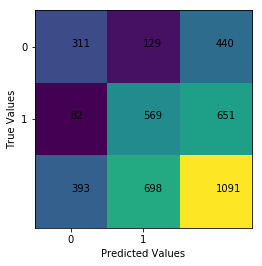

In [12]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [13]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.791349,0.706818,0.746699,440.000000
female,0.815186,0.874040,0.843588,651.000000
accuracy,0.806599,0.806599,0.806599,0.806599
macro avg,0.803267,0.790429,0.795143,1091.000000
weighted avg,0.805573,0.806599,0.804512,1091.000000


In [14]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5910903558493187

# ROC and AUC

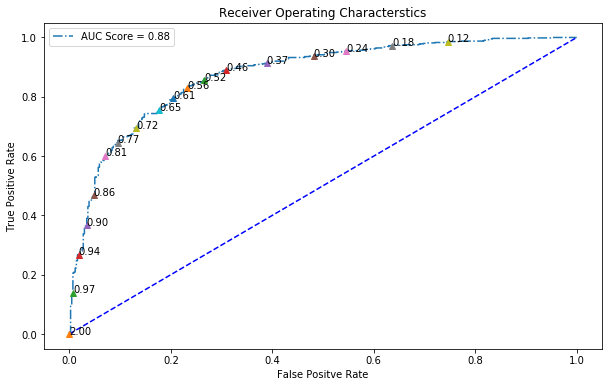

In [15]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

# Hyper Parameter Tuning

In [16]:
model_tune = SVC()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1],
             }

In [19]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=2)

In [20]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.5s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.5s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=0, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   1.3s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   1.0s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=0, gamma=0.1, kernel=poly, total=   1.2s
[CV] C=1, coef0=0, gamma=0.1, kernel=poly ............................
[CV] .

[CV] ........... C=1, coef0=0, gamma=0.005, kernel=poly, total=   1.1s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   1.5s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   1.5s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=1, gamma=0.1, kernel=rbf .............................
[CV] .............. C=1, coef0=1, gamma=0.1, kernel=rbf, total=   1.4s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] ............. C=1, coef0=1, gamma=0.1, kernel=poly, total=   0.9s
[CV] C=1, coef0=1, gamma=0.1, kernel=poly ............................
[CV] .

[CV] ........... C=1, coef0=1, gamma=0.005, kernel=poly, total=   0.8s
[CV] C=1, coef0=1, gamma=0.005, kernel=poly ..........................
[CV] ........... C=1, coef0=1, gamma=0.005, kernel=poly, total=   0.7s
[CV] C=1, coef0=1, gamma=0.005, kernel=poly ..........................
[CV] ........... C=1, coef0=1, gamma=0.005, kernel=poly, total=   0.8s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=0, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] .

[CV] .......... C=10, coef0=0, gamma=0.005, kernel=poly, total=   1.1s
[CV] C=10, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=0, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=10, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=0, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=10, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=0, gamma=0.005, kernel=poly, total=   1.1s
[CV] C=10, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=0, gamma=0.005, kernel=poly, total=   1.1s
[CV] C=10, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=1, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] ............. C=10, coef0=1, gamma=0.1, kernel=rbf, total=   1.3s
[CV] C=10, coef0=1, gamma=0.1, kernel=rbf ............................
[CV] .

[CV] ........... C=10, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=10, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=10, coef0=1, gamma=0.005, kernel=rbf, total=   1.0s
[CV] C=10, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=1, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=10, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=1, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=10, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=1, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=10, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=1, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=10, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=10, coef0=1, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=20, coef0=0, gamma=0.1, kernel=rbf ............................
[CV] .

[CV] ........... C=20, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=20, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=20, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=0, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=20, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=20, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=20, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=20, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .......... C=20, coef0=0, gamma=0.005, kernel=poly, total=   1.0s
[CV] C=20, coef0=0, gamma=0.005, kernel=poly .........................
[CV] .

[CV] .......... C=20, coef0=1, gamma=0.002, kernel=poly, total=   0.9s
[CV] C=20, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=20, coef0=1, gamma=0.005, kernel=rbf, total=   1.1s
[CV] C=20, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .......... C=20, coef0=1, gamma=0.005, kernel=poly, total=   1.2s
[CV] C=20, coef0=1, gamma=0.005, kernel=poly .........................
[CV] .

[CV] .......... C=30, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=30, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=30, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=30, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=30, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=30, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=30, coef0=0, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=30, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] .

[CV] .......... C=30, coef0=1, gamma=0.002, kernel=poly, total=   1.1s
[CV] C=30, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=30, coef0=1, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=30, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=30, coef0=1, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=30, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] ........... C=30, coef0=1, gamma=0.005, kernel=rbf, total=   1.2s
[CV] C=30, coef0=1, gamma=0.005, kernel=rbf ..........................
[CV] .

[CV] ........... C=50, coef0=0, gamma=0.002, kernel=rbf, total=   1.2s
[CV] C=50, coef0=0, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=50, coef0=0, gamma=0.002, kernel=rbf, total=   1.2s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=50, coef0=0, gamma=0.005, kernel=rbf ..........................
[CV] .

[CV] ........... C=50, coef0=1, gamma=0.002, kernel=rbf, total=   1.3s
[CV] C=50, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=50, coef0=1, gamma=0.002, kernel=rbf, total=   1.2s
[CV] C=50, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=50, coef0=1, gamma=0.002, kernel=rbf, total=   1.2s
[CV] C=50, coef0=1, gamma=0.002, kernel=rbf ..........................
[CV] ........... C=50, coef0=1, gamma=0.002, kernel=rbf, total=   1.2s
[CV] C=50, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.002, kernel=poly, total=   1.3s
[CV] C=50, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.002, kernel=poly, total=   1.3s
[CV] C=50, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .......... C=50, coef0=1, gamma=0.002, kernel=poly, total=   1.4s
[CV] C=50, coef0=1, gamma=0.002, kernel=poly .........................
[CV] .

[CV] ......... C=100, coef0=0, gamma=0.001, kernel=poly, total=   1.1s
[CV] C=100, coef0=0, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=0, gamma=0.002, kernel=rbf, total=   1.5s
[CV] C=100, coef0=0, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=0, gamma=0.002, kernel=rbf, total=   1.6s
[CV] C=100, coef0=0, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=0, gamma=0.002, kernel=rbf, total=   1.6s
[CV] C=100, coef0=0, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=0, gamma=0.002, kernel=rbf, total=   1.5s
[CV] C=100, coef0=0, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=0, gamma=0.002, kernel=rbf, total=   1.5s
[CV] C=100, coef0=0, gamma=0.002, kernel=poly ........................
[CV] ......... C=100, coef0=0, gamma=0.002, kernel=poly, total=   1.0s
[CV] C=100, coef0=0, gamma=0.002, kernel=poly ........................
[CV] .

[CV] ......... C=100, coef0=1, gamma=0.001, kernel=poly, total=   1.5s
[CV] C=100, coef0=1, gamma=0.001, kernel=poly ........................
[CV] ......... C=100, coef0=1, gamma=0.001, kernel=poly, total=   1.3s
[CV] C=100, coef0=1, gamma=0.001, kernel=poly ........................
[CV] ......... C=100, coef0=1, gamma=0.001, kernel=poly, total=   1.4s
[CV] C=100, coef0=1, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=1, gamma=0.002, kernel=rbf, total=   1.6s
[CV] C=100, coef0=1, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=1, gamma=0.002, kernel=rbf, total=   1.5s
[CV] C=100, coef0=1, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=1, gamma=0.002, kernel=rbf, total=   1.5s
[CV] C=100, coef0=1, gamma=0.002, kernel=rbf .........................
[CV] .......... C=100, coef0=1, gamma=0.002, kernel=rbf, total=   1.5s
[CV] C=100, coef0=1, gamma=0.002, kernel=rbf .........................
[CV] .

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 13.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

In [22]:
model_grid.best_params_

{'C': 30, 'coef0': 0, 'gamma': 0.002, 'kernel': 'rbf'}

In [23]:
model_grid.best_score_

0.7862777472023482

In [27]:
# WIth best parameter buil ML Model
model_best = SVC(C=30,kernel='rbf',gamma=0.002,probability=True)

In [28]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8093492208982584

In [29]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

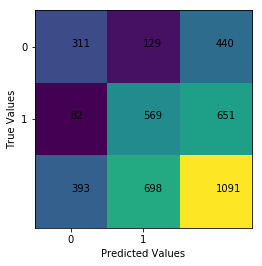

In [12]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [13]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.791349,0.706818,0.746699,440.000000
female,0.815186,0.874040,0.843588,651.000000
accuracy,0.806599,0.806599,0.806599,0.806599
macro avg,0.803267,0.790429,0.795143,1091.000000
weighted avg,0.805573,0.806599,0.804512,1091.000000


In [14]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5910903558493187

# ROC and AUC

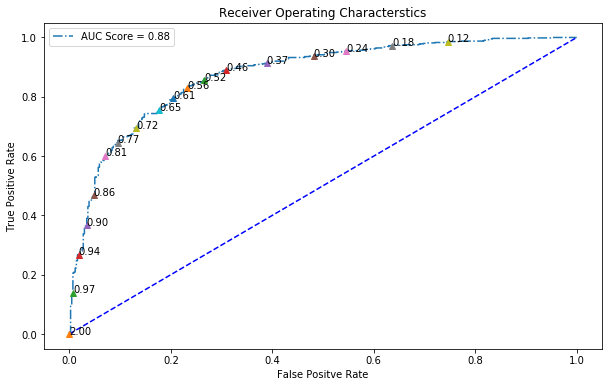

In [15]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [30]:
# save our machine learning model
import pickle

In [31]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [32]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))